In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import pandas as pd
import numpy.random as random

### Review of lecture 16

In lecture 16 we learned:

- some basic statistical concepts 

- How to calculate theoretical distributions given a PDF

- How to simulate data from various distributions.  

- How to estimate the central tendency (mean), spread of the data (variance or standard deviation), and 95% confidence in the mean (1.97 Standard Error). 


### In this lecture we will:

- Learn some statistical tests: t-test, F-test

- Learn some non-parametric approaches to statistical testing (bootstrap, jackknife).  




### Statistical tests

Reference:  Davis, J. (2002), Statistical and Data Analysis in Geology, 3rd Ed, Wiley, Hoboken.  





Now that we have a few distributions under our belt, it would be handy to DO something with them.  What scientists usually do is use statistics of data to do some 'hypothesis testing'.  This involves setting up a statistical tests.    Statistics can help estimate the probability of a statement being true.  The way this is usually framed is as a _null hypothesis_ ($H_o$).

#### Comparison of mean values (normal distributions)

For example, let's say we calculate the mean of a sample $\bar x$ and its standard deviation $s$.   We want to know if  this data set could have been drawn from a population whose mean $\mu$ is known. In this case the null hypothesis is:  

$$H_o: \bar x = \mu$$


You can never be 100% confident of anything, but you can be "pretty confident". In science we usually like to be 95% confident.  The level of certainty is determined by a number $\alpha$ which for 95% confidence is 0.05. 

If the 95% confidence in the mean is 1.97 times the standard error ($s_e=\sigma/\sqrt N$), so if $\bar x$ is more than 1.97$s_e$ away from $\mu$, then we can reject the null hypothesis $H_o$ at the 95% level of confidence.  

Let's say we went to the National Bureau of Standards and measured the 'replica' of the standard meter used until 1960.  We used a regular tape measure (uncertainty of about a centimeter) to measure the meter and repeated the measurement 100 times.  [I'm going to use simulated data for this exercise as in Lecture 16.]    



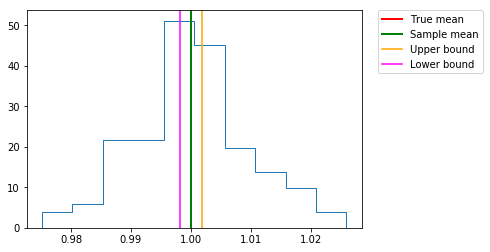

In [8]:
#fig,ax=plt.figure()
mu,sigma,Nmc=1,.01,100 # true mean, standard deviation of the measurements, number of simulations.
Simulated=random.normal(mu,sigma,Nmc) # get Nmc  simulated data points from distribution
s_e=np.std(Simulated)/np.sqrt(Nmc) # standard error of the mean
plt.hist(Simulated,normed=True,histtype='step') # plot the measurements
plt.axvline(mu,color='red',linewidth=2,label='True mean') # axvline plots a vertical line
plt.axvline(x=Simulated.mean(),color='green',linewidth=2,label='Sample mean')
plt.axvline(x=Simulated.mean()+1.97*s_e,color='orange',label='Upper bound')
plt.axvline(x=Simulated.mean()-1.97*s_e,color='magenta',label='Lower bound')
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0); # put the legend outside the plot

So as long as the green line (sample mean) falls between the upper and lower 95% confidence bounds, the null hypothesis cannot be rejected at the 95% level of confidence.  It will 'fail' 5% of the time.

But what if we DON'T know the true mean?  Instead, we have a set of  measurements that we made on the replica with a certain mean $\bar x_1$ and standard deviation $s_1$, and we want to know if a second set of measurements (with $\bar x_2,s_2$),  on a different 'meter' stick could have been made on the replica (or something identical)?  In other words do the two samples have the same mean:

$$H_o : \bar x_1 = \bar x_2.$$

For this kind of test, we use a version of Student's _t-test_ known as the Welch's t-test. (Student's t-test assumes that both samples have the same variance while Welch's allows the two variances to be different).   

We perform the calculations thusly:


Calculate the "Welch's t-test": 


$$t = \frac {\bar {x_1} - \bar {x_2}}{\sqrt { \frac {s_1^2}{n_1} + \frac {s_2^2}{n_2}}}$$

 To do this test we need to understand what _degrees of freedom_, $\nu$, are.  The _degrees of freedom_ is the number of data points you have minus the number of data points you need to calculate the statistic of interest. In this case we estimate $\nu$ like this:  



$$\nu \simeq \frac { \bigl( \frac {s_1^2}{n_1} +  \frac {s_2^2}{n_2} \bigr)^2  }{ \frac {s_1^4}{N_1^2\nu_1} +  \frac {s_2^4}{N_2^2\nu_2}    }$$

where $\nu_1 = n_1-1$ and $\nu_2 = n_2-1$. 


Once $t$ and 
$\nu$  have been calculated, these two statistics can be used with the t-distribution to test the null hypothesis that the two population means are equal.    

To our great joy, the **scipy.stats** module we used in Lecture 16 also has a function **ttest_ind( )** which calculates the _t-test_ for us.  


In [3]:
import scipy.stats as stats
help(stats.ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
    Calculates the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        population variance [2]_.
    
  

To use **stats.ttest_ind( )**, we pass it the two data sets and an option for a keyword **equal_var**. When this is set to **True**, the test is an ordinary Student's t-test which assumes that the variance in the two data sets is the same.  If we don't want to assume that, we use the Welch's version (different variances) by setting **equal_var** to **False**.  

**stats.ttest_ind( )**  returns something called the _p-value_ which, when compared to the level of confidence $\alpha$ (normally taken as .05 for 95% confidence), can tell us whether to reject the null hypothesis:  

$H_o: \bar x_1 = \bar x_2$

If the p-value is smaller than $\alpha$, then $H_o$ should be rejected.  

Let's try this by comparing  a second simulated data set with our first one:  



In [4]:
Simulated_2=random.normal(mu,sigma,Nmc) # get a second data set from the same distribution
print (stats.ttest_ind(Simulated,Simulated_2,equal_var=False)) # evaluate pvalue

Ttest_indResult(statistic=-0.46997277101490559, pvalue=0.63889176198202535)


We can also assign the returned values to variables, say **stat** and **pvalue**:

In [5]:
stat,pvalue=stats.ttest_ind(Simulated,Simulated_2,equal_var=False)
print (stat)
print (pvalue)

-0.469972771015
0.638891761982


So in this case, the p-value greatly exceeds the value of 0.05 for $\alpha$.  The null hypothesis can not be rejected and there is no great surprise that the two means (which were both drawn from distributions with a $\mu=1$) are the same.  

Let's try this with a different values of $\mu$  see what happens:  

In [6]:
print ('mean, sim, p, rejected?')
for mu in np.arange(0,2,.1): # test this with values from 0 to 2
    Sim=random.normal(mu,sigma,Nmc)
    xbar=np.mean(Sim)
    # assign the returned statistics to variables stat, pvalue
    stat,pvalue=stats.ttest_ind(Simulated,Sim,equal_var=False)
    # compare original with various test cases and p-value (note the 'scientific' formatting)
    if pvalue>=0.05:
        h='No'
    else:
        h='Yes'
    print ('%3.1f %5.3f %8.3e, %s'%(np.mean(Simulated),xbar, pvalue,h) )

mean, sim, p, rejected?
1.0 -0.000 0.000e+00, Yes
1.0 0.100 0.000e+00, Yes
1.0 0.200 1.241e-315, Yes
1.0 0.300 4.763e-302, Yes
1.0 0.400 5.831e-292, Yes
1.0 0.500 4.888e-277, Yes
1.0 0.599 5.742e-256, Yes
1.0 0.699 3.793e-231, Yes
1.0 0.799 3.119e-198, Yes
1.0 0.901 1.469e-139, Yes
1.0 1.000 7.826e-01, No
1.0 1.098 2.097e-135, Yes
1.0 1.200 4.105e-199, Yes
1.0 1.300 2.386e-233, Yes
1.0 1.401 1.815e-258, Yes
1.0 1.498 6.416e-277, Yes
1.0 1.598 1.560e-287, Yes
1.0 1.700 5.207e-305, Yes
1.0 1.797 1.762e-316, Yes
1.0 1.900 0.000e+00, Yes


So the only sample for which $H_o$ could not be rejected was the one with a $\mu$ of 1.  Not really surprising... 

#### Comparison of variances

Now let's say we are more interested in comparing the variances instead of the means. For example, is a particular measurement method superior (lower variance) than another.  Say we have a bunch of students (100)  'eyeball' a sedimentary bed that is approximately 1 meter thick,  guessing how long it is in meters.   Are these measurements significantly more scattered than if we made the measurements with a tape measure?   

To compare variances, we use a different test - the _F-test_.  The _F-test_ is based on a theoretical probability distribution known as the _F-distribution_, which is the theoretical distribution of values that would be expected by a random sampling of a normal population and calculating the ratios of variances.  The _F_ statistic is: 

$$ F = \frac {s_1^2}{s_2^2}$$.  

We also need to know the _degrees of freedom_ here and here $\nu$ is $N-1$ for each sample.   


There is a function for this too (whew! - otherwise you have to look up F tables online or in a book! or something).   For that we calculate $F$ as above and $\nu_1,\nu_2$, then call **scipy.stats.f.cdf**:



In [7]:
help(stats.f.cdf) # we already imported scipy

Help on method cdf in module scipy.stats._distn_infrastructure:

cdf(x, *args, **kwds) method of scipy.stats._continuous_distns.f_gen instance
    Cumulative distribution function of the given RV.
    
    Parameters
    ----------
    x : array_like
        quantiles
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    cdf : ndarray
        Cumulative distribution function evaluated at `x`



So, given our two data sets, let's try to see if the variances are statistically different. 

In [8]:
alpha=0.05 # set the level of confidence desired (this is for 95% confidence)

s_1,s_2=np.std(Simulated),np.std(Simulated_2) # get the two standard deviations

F=s_1**2/s_2**2 # evaluate F, the ratio of the two variances
nu_1,nu_2=len(Simulated)-1,len(Simulated_2)-1 # get the two degrees of freedom
pvalue=stats.f.cdf(F,nu_1,nu_2) # get the F ratio value for the test
print ('F=%4.2f p=%4.2f alpha=%4.2f'%(F,pvalue,alpha)) # print them out
if pvalue<alpha: # fails the test
    print ('null hypothesis rejected, the two variances are different')
else: # passes the test
    print ('null hypothesis NOT rejected - the two variances are not different')


F=1.03 p=0.55 alpha=0.05
null hypothesis NOT rejected - the two variances are not different


### Non-parametric tests. 

Obviously, there are a lot of different statistical tests that we could do.  Most of them ASSUME that the data were drawn from a particular type of distribution, i.e., the normal distribution.  But as we already saw in the last lecture, distributions are not always normally distributed.  Many, like grain size data, are most definitely NOT normally distributed.  So what do we do to make these kinds of tests?  

### The bootstrap

If we have a LOT of data and we can safely assume that the underlying distribution is represented by the data, we can do a statistical test known as the _bootstrap_.  The bootstrap is very much like the Monte Carlo approach we are by now very familiar with.  But instead of simulating data, we draw random samples from our own data and perform the test on these _pseudo samples_.    

For example,  let's imagine a case where we have two data sets from some weird distribution.  I'm going to use the lognormal one because I can simulate it and it is not "normal".   


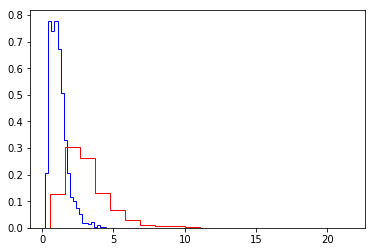

In [15]:
Nmc=1000 # number of Monte Carlo simulations

mu_3,sigma_3=0,.5,
Simulated_3=random.lognormal(mu_3,sigma_3,Nmc) # get Nmc  simulated data points from distribution
plt.hist(Simulated_3,normed=True,bins=20,histtype='step',color='blue') # plot them  - notice the new histtype

mu_4,sigma_4 = 1,.5
Simulated_4=random.lognormal(mu_4,sigma_4,Nmc) # get Nmc  simulated data points from distribution
plt.hist(Simulated_4,normed=True,bins=20,histtype='step',color='red'); # plot them  - notice the new histtype

How do we know if the two means are the same?  We can't use the t-test because that assumes a normal distribution whereas these data are clearly not normally distributed.  

Well, we can calculate the mean (or better yet the mode), then repeat the calculation on a large number  ($N_b$) of  _pseudo-samples_.  A _pseudo-sample_   is a _sample_ (in the statistical sense) created by randomly selecting data points from the original sample. This will give a distribution of means (or modes).  We do this on both data sets.  If the bounds containing 95% of the means (or modes) of each data set overlap, bingo, the means (or modes) are the same.  

Because we want to do this twice, we should make a function that: 
- Draws $N_b$ pseudosamples from a sample and calculates the mean on them.  
- Sorts the $N_b$ means and finds the bounds containing, say, 95% of them.
- Returns these lower and upper bounds of $N_bs$ means, depending on $\alpha$.   

To do this, our function can call **random.choice( )**  which will save us a lot of headache:  

In [10]:
help(random.choice)

Help on built-in function choice:

choice(...) method of mtrand.RandomState instance
    choice(a, size=None, replace=True, p=None)
    
    Generates a random sample from a given 1-D array
    
            .. versionadded:: 1.7.0
    
    Parameters
    -----------
    a : 1-D array-like or int
        If an ndarray, a random sample is generated from its elements.
        If an int, the random sample is generated as if a were np.arange(a)
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, in which case a
        single value is returned.
    replace : boolean, optional
        Whether the sample is with or without replacement
    p : 1-D array-like, optional
        The probabilities associated with each entry in a.
        If not given the sample assumes a uniform distribution over all
        entries in a.
    
    Returns
    --------
    samples : single item o

Here is a little function called **bootstrap( )** I wrote (you are welcome), which does what we want.  

In [11]:
def bootstrap(Nb, sample,alpha):
    """
    chooses Nb pseudosamples from sample, 
    calculates means and returns the lower and upper confidence bounds, dependent on alpha
    """
    Ns=len(sample) # get the number of data points in the sample
    bootstrapped_means=[] # make a list for the means
    for i in range(Nb):# do this Nb times
        # random.choice gets us the pseudosample
        pseudo_sample=random.choice(sample,size=len(sample),replace=True) 
        bootstrapped_means.append(pseudo_sample.mean()) # appends the mean
    bootstrapped_means=sorted(bootstrapped_means) # sort the means
    upper_bound_index=int((1.-alpha/2.)*Nb) # get the index for the upper bound
    lower_bound_index=Nb-int((1.-alpha/2.)*Nb) # same for lower bound
    return bootstrapped_means[lower_bound_index],bootstrapped_means[upper_bound_index]
    

In [12]:
# check it out: 
lower_bound,upper_bound=bootstrap(10,Simulated_3,.05)
print (Simulated_3.mean()) # calculate the mean of the distribution
print (lower_bound,upper_bound) # calculate the 95% bounds (alpha=.05)

1.13065152531
1.1020862869 1.15373538395


Well, that seems to have worked because the mean falls between the two confidence bounds.    

Our next task will be to plot the two sets of bounds on our histogram and see if they overlap each other.  



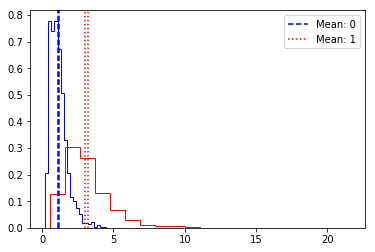

In [17]:
Nb=1000 # let's get 1000 bootstrapped means (the more the merrier)

lower_bound_1,upper_bound_1=bootstrap(Nb,Simulated_3,.05) # get the bounds for first set
plt.hist(Simulated_3,normed=True,bins=20,histtype='step',color='blue') # plot them  - notice the new histtype
plt.axvline(lower_bound_1,color='blue',linestyle='dashed', label="Mean: 0")# put on one bound
plt.axvline(upper_bound_1,color='blue',linestyle='dashed')# put on one bound


lower_bound_2,upper_bound_2=bootstrap(Nb,Simulated_4,.05) # get the bounds for second set
plt.hist(Simulated_4,normed=True,bins=20,histtype='step',color='red'); # plot them  - notice the new histtype
plt.axvline(lower_bound_2,color='red',linestyle='dotted', label="Mean: 1")# put on one bound
plt.axvline(upper_bound_2,color='red',linestyle='dotted')# put on one bound
plt.legend();

And the two data sets are statistically distinct at the 95% confidence level.  We can repeat this exercise with two new simulated data sets, drawn from populations with the same mean and see if you get a different answer:  

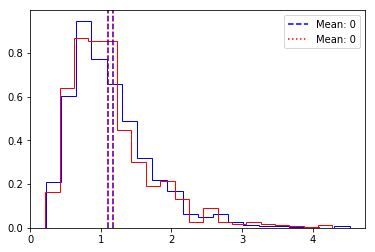

In [18]:
mu_5,sigma_5,mu_6,sigma_6=0,.5,0,.5
Nmc=1000 # number of monte carlo simultions
Simulated_5=random.lognormal(mu_5,sigma_5,Nmc) # get Nmc  simulated data points from distribution
Simulated_6=random.lognormal(mu_6,sigma_6,Nmc) # get Nmc  simulated data points from distribution

Nb=1000 # let's get 1000 bootstrapped means (the more the merrier)
lower_bound_1,upper_bound_1=bootstrap(Nb,Simulated_5,.05) # get the bounds for first set
plt.hist(Simulated_5,normed=True,bins=20,histtype='step',color='blue') # plot them  - notice the new histtype
plt.axvline(lower_bound_1,color='blue',linestyle='dashed', label="Mean: 0")# put on one bound
plt.axvline(upper_bound_1,color='blue',linestyle='dashed')# put on one bound


lower_bound_2,upper_bound_2=bootstrap(Nb,Simulated_6,.05) # get the bounds for second set
plt.hist(Simulated_6,normed=True,bins=20,histtype='step',color='red'); # plot them  - notice the new histtype
plt.axvline(lower_bound_2,color='red',linestyle='dotted', label="Mean: 0")# put on one bound
plt.axvline(upper_bound_2,color='red',linestyle='dotted')# put on one bound
plt.legend();

Now the uncertainty bounds overlap.  As they should!  

You can do this same type of thing calculating modes, means, standard deviations or pretty much anything you like.  

### The jackknife


The jacknife is similar to the bootstrap, but instead of resampling the sample with the same number of data points, we delete one of the data points, calculate the statistic of interest, then delete the next, until we have repeated it N times. This is called the _delete one_ jackknife.  You can also do a delete-two jackknife or more, depending on how many data points are in the sample.   
